In [4]:
%run simulated_stock_evaluation_gbm.ipynb

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000070
Mean of Annua. Log Returns  0.017522
Std  of Annua. Log Returns  0.201926
---------------------------------------------
Skew of Sample Log Returns -0.015754
Skew Normal Test p-value    0.741831
---------------------------------------------
Kurt of Sample Log Returns  0.120584
Kurt Normal Test p-value    0.206531
---------------------------------------------
Normal Test p-value         0.426539
---------------------------------------------
Realized Volatility         0.201929
Realized Variance           0.040775


In [23]:
def read_dax_data():
    ''' Reads historical DAX data from Yahoo! Finance, calculates log returns,
    realized variance and volatility.'''
    DAX = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data_long.csv',
                      index_col=0, parse_dates=True)['.GDAXI']
    DAX = pd.DataFrame(DAX)
    DAX = DAX.loc['2012-01-01':'2022-01-01']
    DAX.rename(columns={'.GDAXI': 'index'}, inplace=True)
    DAX['returns'] = np.log(DAX['index'] / DAX['index'].shift(1))
    DAX['realized_var'] = 252 * np.cumsum(DAX['returns'] ** 2) / np.arange(len(DAX))
    DAX['realized_vol'] = np.sqrt(DAX['realized_var'])
    DAX = DAX.dropna()
    return DAX

In [24]:
df = read_dax_data()

In [13]:
def count_jumps(df, value):
    """Count number of times the returns was greater than the value"""
    jumps = np.sum(np.abs(df['returns']) > value)
    return jumps

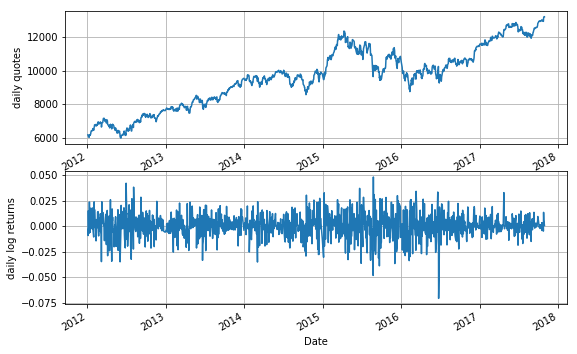

In [26]:
quotes_returns(df)

## Daily log returns chart show volatility clustering and time varying volatility as amplitude of volaitliy is changing with time.

In [27]:
df.tail() # so data is only till 2017 October

,index,returns,realized_var,realized_vol
Date,,,,
2017-10-24,13013.19,0.000773,0.031198,0.176629
2017-10-25,12953.41,-0.004604,0.031181,0.176581
2017-10-26,13133.28,0.013790,0.031192,0.176612
2017-10-27,13217.54,0.006395,0.031178,0.176573
2017-10-30,13229.57,0.000910,0.031158,0.176515


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


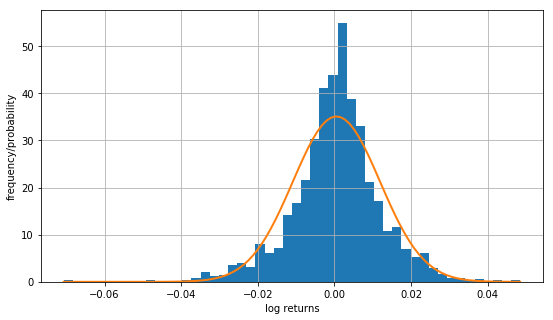

In [28]:
return_histogram(df)

## Sample distribution seems to have a higher peak and heavier tails than the N.D of same mean and variance showing a little divergence from N.D

## But skewness and kurtosis cannot be seem visually, may have to run test to check that

<Figure size 648x360 with 0 Axes>

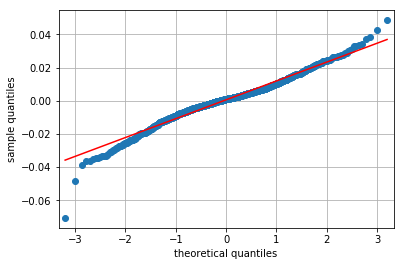

In [29]:
return_qqplot(df)

## Q-Q plot shows a little deviation from the normal distribution assumption 

In [25]:
print_statistics(df)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000546
Mean of Annua. Log Returns  0.137694
Std  of Annua. Log Returns  0.180455
---------------------------------------------
Skew of Sample Log Returns -0.315302
Skew Normal Test p-value    0.000001
---------------------------------------------
Kurt of Sample Log Returns  2.193597
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.176515
Realized Variance           0.031158


## Small p-value for skewness and kurtosis test shows that null hypothesis that sample distribution is normal an be rejected with high significance 

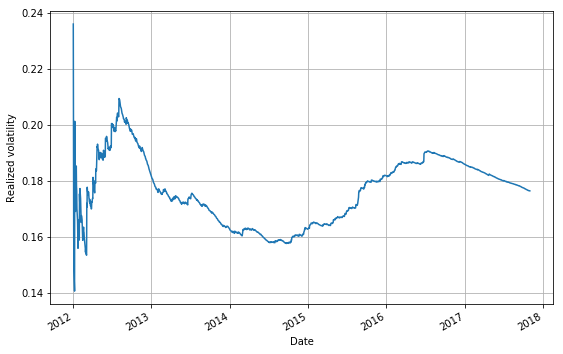

In [30]:
realized_vol(df)

## Historical volatility does not seems to converge anywhere to some constant, in the beginning it was high at 22%, then goes down to 16% and then again goes up to 19%.

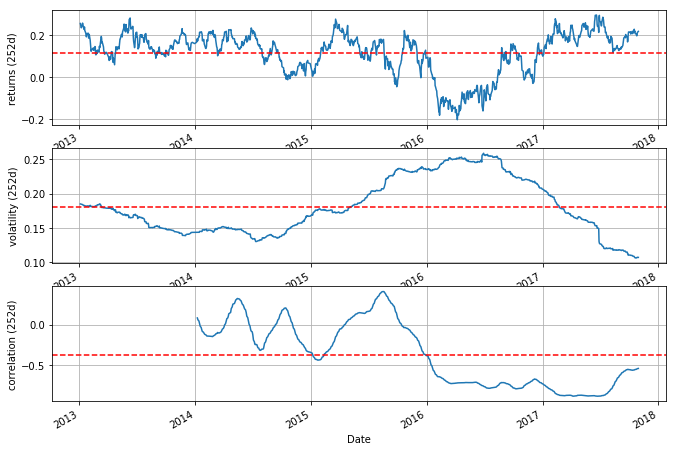

In [31]:
rolling_statistics(df)

## rolling volatility flcutuates in the range of 25% to 12%. We can observe that when volatility goes up, then it comes down and when it goes down, after that it go up implying volatility is mean reverting

## Correlation curve has negative average line implying leverage effect which means that index returns and volatility has negative correlation

In [32]:
count_jumps(df, 0.05)

1

In [33]:
# not much evidence of jump in returns from +-5%